<a href="https://colab.research.google.com/github/baiqtiara/baiqtiara/blob/main/Salinan_dari_pertemuan6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# first two terms
n1, n2 = 0, 1
count = 0

# check if the number of terms is valid
if nterms <= 0:
  print("Please enter a positive integer")
elif nterms == 1:
  print("Fibonnaci sequence upto" ,nterms, ":")
  print(n1)
else:
  print("Fibonnaci sequence:")
  while count < nterms:
    print(n1)
    nth = n1 + n2
    # update values
    m1 = n2
    n2 = nth
    count += 1

Fibonnaci sequence:
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
#Fibonnaci dengan while
nterms = int(input("How many terms? "))
n1, n2 = 0, 1
count = 0

if nterms <= 0:
  print("Please enter a positive integer")
elif nterms == 1:
  print("Fibonacci sequence upto ",nterms,":")
  print(n1)
else:
  print("Fibonnaci sequence:")
  while count < nterms:
    print(n1)
    nth = n1+n2
    #update nilai
    n1 = n2
    n2 = nth
    count += 1

How many terms? 20
Fibonnaci sequence:
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import random
import time
import itertools

In [ ]:
#Try All Tours (exact_TSP)
def exact_TSP(cities):
    "Generate all possible tours of the cities and choose the shortest one."
    return shortest(alltours(cities))

def shortest(tours):
    "Return the tour with the minimum total distance."
    return min(tours, key=total_distance)

In [ ]:
#Represting Tours
alltours = itertools.permutations # The permutation function is already defined in the itertools module

cities = {1, 2, 3}

list(alltours(cities))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

In [ ]:
#Representing Cities and Distance
def total_distance(tour):
    "The total distance between each pair consecutive cities in the tour."
    return sum(distance(tour[i], tour[i-1]) for i in range(len(tour)))

In [ ]:
City = complex # Constructor for new cities, e.g. City(300, 400)

def distance(A, B):
    "The distance between two points."
    return abs(A - B)

In [ ]:
A = City(300, 0)
B = City(0, 400)
distance(A, B)

500.0

In [ ]:
def Cities(n):
  "Make a set of n cities, each with random coordinates."
  return set(City(random.randrange(10, 890), random.randrange(10, 590)) for c in range(n))


random.seed('seed')
cities8, cities10, cities100, cities1000 = Cities(8), Cities(10), Cities(100), Cities(1000)
cities8

{(151+70j),
 (252+365j),
 (303+506j),
 (498+96j),
 (54+361j),
 (551+542j),
 (684+435j),
 (800+430j)}

In [ ]:
tour = exact_TSP(cities8)

print(tour)
print(total_distance(tour))

((551+542j), (303+506j), (252+365j), (54+361j), (151+70j), (498+96j), (800+430j), (684+435j))
1990.388372313552


In [ ]:
#Plotting
import time
def plot_tour(algorithm, cities):
  "Apply a TSP algorithm to cities, and plot the resulting tour."
  # Find the solution and time how long it takes
  t0 = time.time()
  tour = algorithm(cities)
  t1 = time.time()
  # Plot the tour as blue lines between blue circles, and the starting city as a red square.
  plotline(list(tour) + [tour[0]])
  plotline([tour[0]], 'rs')
  plt.show()
  print("{} city tour; total distance = {:.1f}; time = (:.3f) secs for {}".format(
        len(tour), total_distance(tour), t1-t0, algorithm.__name__))

def plotline(points, style='bo-'):
    "Plot a list of points (complex numbers) in the 2-D plane."
    X, Y = XY(points)
    plt.plot(X, Y, style)

def XY(points):
    "Given a list of points, return two lists: X coordinates, and Y coordinates."
    return [p.real for p in points], [p.imag for p in points]



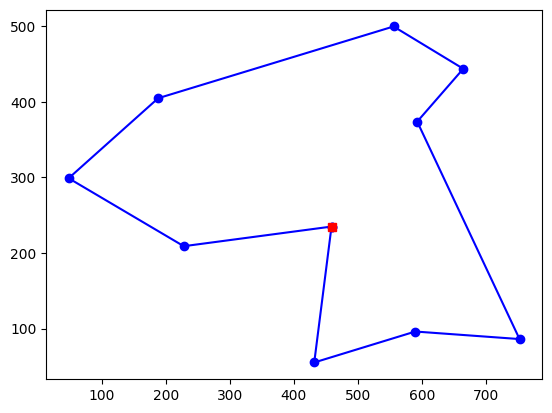

10 city tour; total distance = 2050.3; time = (:.3f) secs for 13.82033634185791


In [ ]:
plot_tour(exact_TSP, cities10)

In [ ]:
#Greedy Nearest Neighbor (greedy_TSP)

def greedy_TSP(cities):
    "At each step, visit the nearest neighbor that is still unvisited. "
    start = first(cities)
    tour = [start]
    unvisited = cities - {start}
    while unvisited:
        C = nearest_neighbor(tour[-1], unvisited)
        tour.append(C)
        unvisited.remove(C)
    return tour

def nearest_neighbor(A, cities):
    "Find the city in cities that is nearest to city A."
    return min(cities, key=lambda x: distance(x, A))